### Import Packages Needed

In [30]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset ID
dataset_id = "d_17f5382f26140b1fdae0ba2ef6239d2f"
url = f"https://data.gov.sg/api/action/datastore_search?resource_id={dataset_id}"

# Fetch data
response = requests.get(url)

# Convert response to JSON
data = response.json()

# Extract records
if "result" in data and "records" in data["result"]:
    df = pd.DataFrame(data["result"]["records"])
    print("Succefully transformed to dataframe")  # Display first few rows
else:
    print("Error: Unable to fetch data or invalid response format")

Succefully transformed to dataframe


In [17]:
df = pd.DataFrame(data["result"]["records"])

In [18]:
df.columns

Index(['_id', 'blk_no', 'street', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'market_hawker', 'miscellaneous',
       'multistorey_carpark', 'precinct_pavilion', 'bldg_contract_town',
       'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold',
       '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental'],
      dtype='object')

In [19]:
coldrop = ['_id', 'max_floor_lvl', 'year_completed']
df_use = df.drop(columns = coldrop)
df_use.head()

,blk_no,street,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,bldg_contract_town,total_dwelling_units,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
0,1,BEACH RD,Y,Y,N,N,N,N,KWN,142,...,138,1,2,0,0,0,0,0,0,0
1,1,BEDOK STH AVE 1,Y,N,N,Y,N,N,BD,206,...,204,0,2,0,0,0,0,0,0,0
2,1,CANTONMENT RD,N,Y,N,N,N,N,CT,0,...,0,0,0,0,0,0,0,0,0,0
3,1,CHAI CHEE RD,Y,N,N,N,N,N,BD,102,...,0,10,92,0,0,0,0,0,0,0
4,1,CHANGI VILLAGE RD,Y,Y,N,N,N,N,PRC,55,...,54,0,1,0,0,0,0,0,0,0


In [20]:
df_use.isna().sum()

blk_no                   0
street                   0
residential              0
commercial               0
market_hawker            0
miscellaneous            0
multistorey_carpark      0
precinct_pavilion        0
bldg_contract_town       0
total_dwelling_units     0
1room_sold               0
2room_sold               0
3room_sold               0
4room_sold               0
5room_sold               0
exec_sold                0
multigen_sold            0
studio_apartment_sold    0
1room_rental             0
2room_rental             0
3room_rental             0
other_room_rental        0
dtype: int64

In [44]:
df_use["total_dwelling_units"] = df_use["total_dwelling_units"].astype(int)
df_use = df_use.query("residential != 'N' and total_dwelling_units > 0")
#df_use[df_use['residential'] == "N"]
#df_use[df_use['total_dwelling_units'] == 0]

In [ ]:
df_group_town = df_use.groupby("bldg_contract_town")['total_dwelling_units'].sum().reset_index()
df_group_town = df_group_town.sort_values(by = "total_dwelling_units", ascending = False)

In [36]:
df_group_town

,bldg_contract_town,total_dwelling_units
6,CT,2235
9,KWN,1978
7,GL,1460
3,BM,1185
1,BD,1166
13,QT,840
16,TP,656
5,CCK,271
4,BT,256
17,WL,243


<Axes: xlabel='bldg_contract_town', ylabel='total_dwelling_units'>

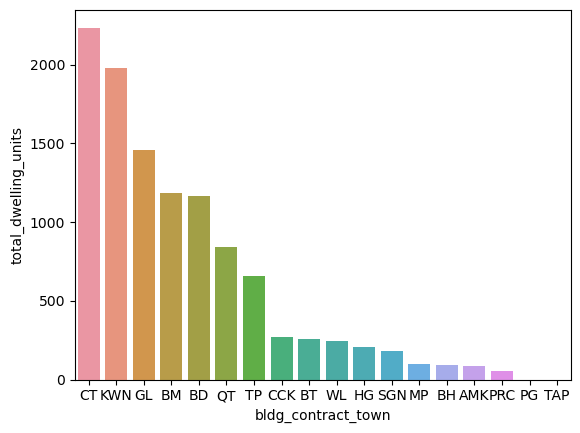

In [37]:
sns.barplot(data = df_group_town, x = "bldg_contract_town", y = "total_dwelling_units")

Legend: AMK - ANG MO KIO BB - BUKIT BATOK BD - BEDOK BH - BISHAN BM - BUKIT MERAH BP - BUKIT PANJANG BT - BUKIT TIMAH CCK - CHOA CHU KANG CL - CLEMENTI CT - CENTRAL AREA GL - GEYLANG HG - HOUGANG JE - JURONG EAST JW - JURONG WEST KWN - KALLANG/WHAMPOA MP - MARINE PARADE PG - PUNGGOL PRC - PASIR RIS QT - QUEENSTOWN SB - SEMBAWANG SGN - SERANGOON SK - SENGKANG TAP - TAMPINES TG - TENGAH TP - TOA PAYOH WL - WOODLANDS YS - YISHUN

In [ ]:
int_columns = ['1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 
               'exec_sold', 'multigen_sold','studio_apartment_sold', '1room_rental', '2room_rental', 
               '3room_rental','other_room_rental']
df_use[int_columns] = df_use[int_columns].astype(int)
#df_use['avail_for_sale'] = df_use[int_columns].sum(axis = 1)
#df_use['avail_for_sale']